In [1]:
import pandas as pd
import numpy
import csv
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

In [2]:
PATH_DATA = '../data/dataset/'

In [3]:
features = pd.read_csv(PATH_DATA+'features.csv') # this dataframe will be changed during analysis
extra = pd.read_csv(PATH_DATA+'features.csv') 

In [4]:
countries = features.COUNTRY.values

In [5]:
features = features.set_index(countries)
del features['COUNTRY']

In [6]:
f = features.T

In [7]:
f = f.fillna(method='backfill')

In [8]:
features = f.T

In [9]:
features.head()

,ConsumpPerCapita1990wheat,ConsumpPerCapita1991wheat,ConsumpPerCapita1992wheat,ConsumpPerCapita1993wheat,ConsumpPerCapita1994wheat,ConsumpPerCapita1995wheat,ConsumpPerCapita1996wheat,ConsumpPerCapita1997wheat,ConsumpPerCapita1998wheat,ConsumpPerCapita1999wheat,...,ConsumpPerCapita2007oils,ConsumpPerCapita2008oils,ConsumpPerCapita2009oils,ConsumpPerCapita2010oils,ConsumpPerCapita2011oils,ConsumpPerCapita2012oils,ConsumpPerCapita2013oils,ConsumpPerCapita2014oils,ConsumpPerCapita2015oils,ConsumpPerCapita2016oils
ARG,117.446701,114.478796,111.899668,113.951805,115.486626,114.588394,119.312191,115.895631,114.454177,114.603629,...,18.758059,18.752365,18.746407,18.739019,18.729791,18.719534,18.709797,18.702684,18.699699,18.701254
AUS,83.033221,82.837751,83.025425,83.095946,80.353182,95.208574,100.824780,79.540724,74.636709,77.724411,...,16.710533,18.334262,17.895277,21.923562,22.696766,21.491464,20.156624,22.802832,22.191564,20.486166
BGD,18.630322,18.959599,18.551645,18.693196,19.379933,20.003754,18.258142,17.285174,19.719492,21.227799,...,8.346086,8.212680,9.423742,8.990429,10.410250,10.477492,11.375794,12.844989,13.262791,13.624011
BRA,43.339742,49.046262,49.556243,49.615930,49.918724,49.768040,50.936717,50.627231,51.021461,51.399610,...,25.429955,22.448161,25.084140,23.689795,21.998554,24.421140,25.356492,24.257562,22.375531,22.667554
CAN,78.828910,76.022426,78.740649,82.141714,85.226072,87.039093,89.878825,89.511291,91.258467,93.697560,...,26.510678,26.254263,25.634366,25.611824,28.359101,26.989506,29.080688,24.825376,27.466357,25.387355


In [10]:
def split_df(df, from_year, to_year):
    spl_df = pd.DataFrame()

    for column in df.columns:
        if any([str(year) in column for year in range(from_year, to_year + 1)]):
            spl_df[column] = df[column]

    return spl_df

In [11]:
df_splited = split_df(features, 1995, 1999)

In [12]:
df_splited.head()

,ConsumpPerCapita1995wheat,ConsumpPerCapita1996wheat,ConsumpPerCapita1997wheat,ConsumpPerCapita1998wheat,ConsumpPerCapita1999wheat,ConsumpPerCapita1995maize,ConsumpPerCapita1996maize,ConsumpPerCapita1997maize,ConsumpPerCapita1998maize,ConsumpPerCapita1999maize,...,ConsumpPerCapita1995grains,ConsumpPerCapita1996grains,ConsumpPerCapita1997grains,ConsumpPerCapita1998grains,ConsumpPerCapita1999grains,ConsumpPerCapita1995oils,ConsumpPerCapita1996oils,ConsumpPerCapita1997oils,ConsumpPerCapita1998oils,ConsumpPerCapita1999oils
ARG,114.588394,119.312191,115.895631,114.454177,114.603629,28.575659,28.232890,27.906485,27.592618,30.015236,...,9.200985,12.105112,16.834635,18.004155,14.760661,20.336917,28.793301,22.585421,36.751158,16.252659
AUS,95.208574,100.824780,79.540724,74.636709,77.724411,3.751772,3.766717,3.727117,3.741480,3.702345,...,10.518107,12.650927,12.659238,12.569387,13.836328,19.679339,22.846566,16.200310,22.053421,19.491088
BGD,20.003754,18.258142,17.285174,19.719492,21.227799,0.016888,0.198368,0.024277,0.023778,0.069905,...,0.447530,0.512451,0.485539,0.491402,0.473800,4.050996,4.561980,4.619272,6.348677,6.576265
BRA,49.768040,50.936717,50.627231,51.021461,51.399610,24.884020,21.173220,21.025191,17.886834,20.790853,...,1.561555,1.649552,1.721868,1.726900,1.843082,18.530944,18.530944,18.530944,18.530944,18.530944
CAN,87.039093,89.878825,89.511291,91.258467,93.697560,54.278508,53.771565,53.294726,52.837409,52.386590,...,18.717057,20.276468,15.995398,19.064428,19.651405,52.910614,53.493073,32.455053,29.078068,29.948926


In [13]:
products = list(set([i[20:] for i in df_splited.columns]))

In [14]:
def decrease_features(df, food):
    spl_df = pd.DataFrame()
    for f in food:
        df_food = pd.DataFrame()
        for column in df.columns:       
            if f in column:
                df_food[column] = df[column]
        spl_df[f] = df_food.mean(axis=1)
    return spl_df

In [15]:
df_dcrs = decrease_features(df_splited, products)

In [16]:
df_dcrs.head()

,maize,pig,butter,cheese,grains,oils,sheep,sugar,poultry,beef,soya,wheat,rice
ARG,28.464578,5.243092e+00,1.263563,11.116381,14.181110,24.943891,1.672351,3.640029e+01,21.097407,43.817895,2.791885e-01,115.770805,5.833029
AUS,3.737886,1.498300e+01,4.303939,9.587993,12.446797,20.054145,15.037296,5.032118e+01,25.494092,27.182201,0.000000e+00,85.587040,13.856611
BGD,0.066643,5.685452e-07,0.146902,0.009212,0.482144,5.231438,0.872033,7.289041e-07,0.807885,0.921671,7.289041e-07,19.298872,145.228779
BRA,21.152024,7.122320e+00,0.473698,2.575913,1.700591,18.530944,0.515659,5.126191e+01,21.255707,23.864761,8.396723e-05,50.750612,47.644134
CAN,53.313760,2.164146e+01,2.789956,10.499499,18.740951,39.577147,0.702660,4.184655e+01,28.371883,23.228815,1.691828e+01,90.277047,8.093954


In [17]:
df_dcrs.shape

(42, 13)

In [18]:
def add_external(df):
    df['meat'] = df['beef']+df['pig']+df['sheep']+df['poultry']
    df['carbs'] = df['grains']+df['wheat']
    return df 
new_df = add_external(df_dcrs)

In [19]:
new_df.head(0)

,maize,pig,butter,cheese,grains,oils,sheep,sugar,poultry,beef,soya,wheat,rice,meat,carbs


In [20]:
def predict_clusters(df, num_clust, countries):
    kmeans = KMeans(n_clusters=num_clust)
    kmeans.fit(df)
    y = kmeans.predict(df)
    data = pd.DataFrame(countries['COUNTRY'])
    data['cluster'] = pd.Series(y)
    return data

In [21]:
def create_table_data_years(features, year_start, year_end, products, lag, extra): 
    splited_df = split_df(features, year_start, year_end)
    decreased_df = decrease_features(splited_df, products)
    df_i = predict_clusters(decreased_df, lag, extra)
    df_i.to_csv(PATH_DATA+str(year_start)+'_'+str(year_end)+'.csv')

In [22]:
df1 = create_table_data_years(features, 1995, 1999, products, 5, extra)

In [23]:
def union_ranges(df, from_year, to_year, range_year):
    df_res = pd.DataFrame()
    #def split_df(df, from_year, to_year):
    for year in range(from_year, to_year, range_year):
        fr = max(year, 1990)
        to = min(year+range_year, 2016)
        df_year = split_df(df, fr, to)
        df_year_aver = decrease_features(df_year, products)
        df_year_aver.index = [i + "_" + str(fr) + "_" + str(to) for i in df_year_aver.index]
        df_res = df_res.append(df_year_aver)
    return df_res

In [24]:
df_union = union_ranges(features, 1990, 2017, 10)

In [25]:
df_union = union_ranges(features, 1990, 2016, 3)

In [26]:
df_union.head()

,maize,pig,butter,cheese,grains,oils,sheep,sugar,poultry,beef,soya,wheat,rice
ARG_1990_1993,25.407510,4.140218e+00,1.203777,9.712539,17.981278,10.930282,2.106154,3.274356e+01,13.311938,52.315455,2.992713e-01,114.444243,4.638029
AUS_1990_1993,4.051273,1.469822e+01,4.057819,8.269423,8.434897,17.750787,18.325628,4.772368e+01,22.286952,26.953079,0.000000e+00,82.998085,13.987697
BGD_1990_1993,0.027818,6.401592e-07,0.133120,0.009063,0.647859,3.163548,0.674657,8.207169e-07,0.689091,0.923795,8.207169e-07,18.708691,144.433219
BRA_1990_1993,23.342385,5.640983e+00,0.344705,1.943550,1.685418,18.530944,0.668470,4.488415e+01,13.669070,19.110347,9.840842e-06,47.889544,51.037696
CAN_1990_1993,56.347089,2.116767e+01,2.994519,9.542668,17.462408,32.719447,0.747040,4.237627e+01,25.988447,23.914885,1.053227e+01,78.933425,6.522164


In [27]:
# df_union.to_csv(PATH_DATA+'big_df.csv')

In [28]:
features.head()

,ConsumpPerCapita1990wheat,ConsumpPerCapita1991wheat,ConsumpPerCapita1992wheat,ConsumpPerCapita1993wheat,ConsumpPerCapita1994wheat,ConsumpPerCapita1995wheat,ConsumpPerCapita1996wheat,ConsumpPerCapita1997wheat,ConsumpPerCapita1998wheat,ConsumpPerCapita1999wheat,...,ConsumpPerCapita2007oils,ConsumpPerCapita2008oils,ConsumpPerCapita2009oils,ConsumpPerCapita2010oils,ConsumpPerCapita2011oils,ConsumpPerCapita2012oils,ConsumpPerCapita2013oils,ConsumpPerCapita2014oils,ConsumpPerCapita2015oils,ConsumpPerCapita2016oils
ARG,117.446701,114.478796,111.899668,113.951805,115.486626,114.588394,119.312191,115.895631,114.454177,114.603629,...,18.758059,18.752365,18.746407,18.739019,18.729791,18.719534,18.709797,18.702684,18.699699,18.701254
AUS,83.033221,82.837751,83.025425,83.095946,80.353182,95.208574,100.824780,79.540724,74.636709,77.724411,...,16.710533,18.334262,17.895277,21.923562,22.696766,21.491464,20.156624,22.802832,22.191564,20.486166
BGD,18.630322,18.959599,18.551645,18.693196,19.379933,20.003754,18.258142,17.285174,19.719492,21.227799,...,8.346086,8.212680,9.423742,8.990429,10.410250,10.477492,11.375794,12.844989,13.262791,13.624011
BRA,43.339742,49.046262,49.556243,49.615930,49.918724,49.768040,50.936717,50.627231,51.021461,51.399610,...,25.429955,22.448161,25.084140,23.689795,21.998554,24.421140,25.356492,24.257562,22.375531,22.667554
CAN,78.828910,76.022426,78.740649,82.141714,85.226072,87.039093,89.878825,89.511291,91.258467,93.697560,...,26.510678,26.254263,25.634366,25.611824,28.359101,26.989506,29.080688,24.825376,27.466357,25.387355


# Clustering

In [29]:
features.shape

(42, 357)

In [30]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
y_kmeans = kmeans.predict(features)

In [32]:
len(y_kmeans)

42

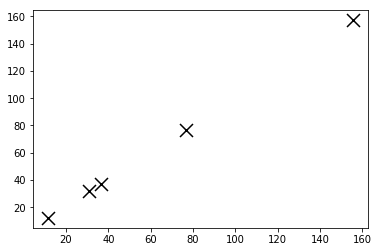

In [33]:
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10)

In [34]:
y_kmeans

array([0, 0, 1, 0, 0, 3, 1, 2, 3, 3, 2, 0, 2, 2, 1, 1, 3, 2, 1, 3, 1, 4, 2,
       1, 2, 0, 3, 0, 1, 2, 0, 0, 2, 1, 3, 2, 3, 0, 0, 1, 4, 4], dtype=int32)

In [35]:
data = pd.DataFrame(extra['COUNTRY'])
data['cluster'] = pd.Series(y_kmeans)

In [36]:
#data.to_csv(PATH_DATA+'1995_2016.csv', index=False)

In [37]:
data[:][data['cluster']==3]

,COUNTRY,cluster
5,CHL,3
8,DZA,3
9,EGY,3
16,IRN,3
19,KAZ,3
26,PAK,3
34,TUR,3
36,UKR,3
